In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import 
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

## 1. Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.
    Choose features other than the ones used in the lesson.
    Visualize the results of your clustering.
    Use the elbow method to visually select a good value for k.
    Repeat the clustering, this time with 3 different features.

In [2]:
df = sns.load_dataset('iris')
X = df.drop(columns = 'species')
y = df.species

In [3]:
train_validate, test = train_test_split(df, test_size=.2)
train, validate = train_test_split(train_validate, test_size=.25)

In [4]:
X_train = train.drop(columns='species')
y_train = train.species

In [5]:
columns = ['petal_width', 'sepal_width']

In [6]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_train[columns])

KMeans(n_clusters=4)

In [7]:
kmeans.inertia_

9.303311867905055

In [8]:
X_train['clusters'] = kmeans.labels_

In [9]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=columns)

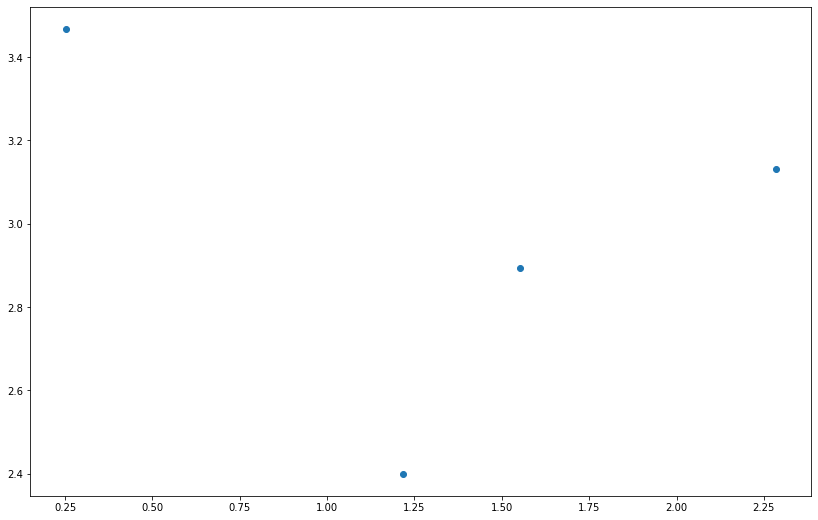

In [10]:
plt.figure(figsize=(14, 9))
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1]);

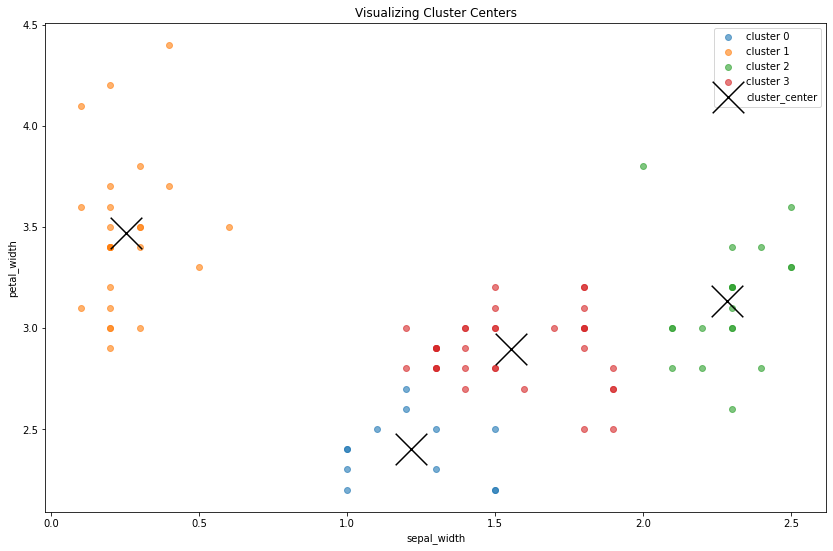

In [11]:
plt.figure(figsize=(14, 9))

for cluster, subset in X_train.groupby('clusters'):
    plt.scatter(subset.petal_width, subset.sepal_width, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(
    x='petal_width',
    y='sepal_width',
    c='black',
    marker='x',
    s=1000,
    ax=plt.gca(),
    label='cluster_center'
)

plt.legend()
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.title('Visualizing Cluster Centers');

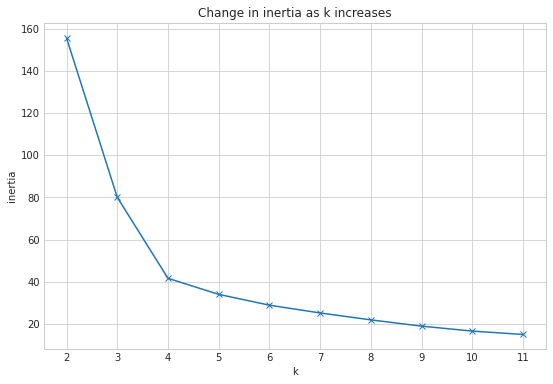

In [12]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_train).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [13]:
X_train['petal_area'] = X_train.petal_length * X_train.petal_width
X_train['sepal_area'] = X_train.sepal_length * X_train.sepal_width

In [14]:
X_train[['clusters', 'petal_area', 'sepal_area']]

,clusters,petal_area,sepal_area
9,1,0.15,15.19
135,2,14.03,23.10
63,3,6.58,17.69
84,3,6.75,16.20
137,3,9.90,19.84
...,...,...,...
6,1,0.42,15.64
109,2,15.25,25.92
59,3,5.46,14.04
130,3,11.59,20.72


In [44]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train[columns])

KMeans(n_clusters=2)

In [45]:
kmeans.cluster_centers_

array([[1.70461538, 2.87230769],
       [0.252     , 3.468     ]])

In [46]:
X_train['clusters2'] = kmeans.labels_

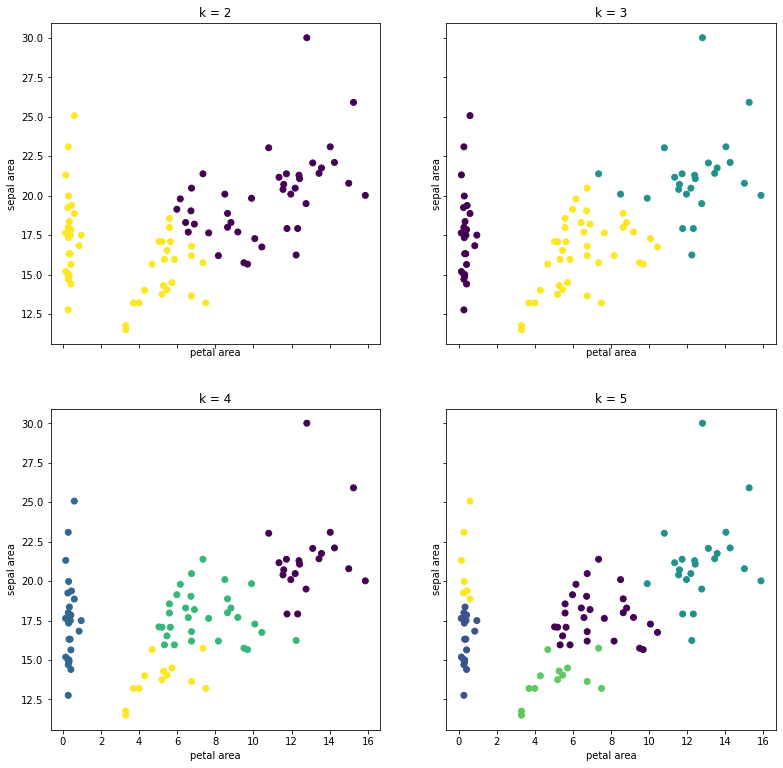

In [52]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_train).predict(X_train)
    ax.scatter(X_train.petal_area, X_train.sepal_area, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='petal area', ylabel='sepal area');

In [48]:
x=X_train.petal_area
y=X_train.sepal_area
z=X_train.clusters2

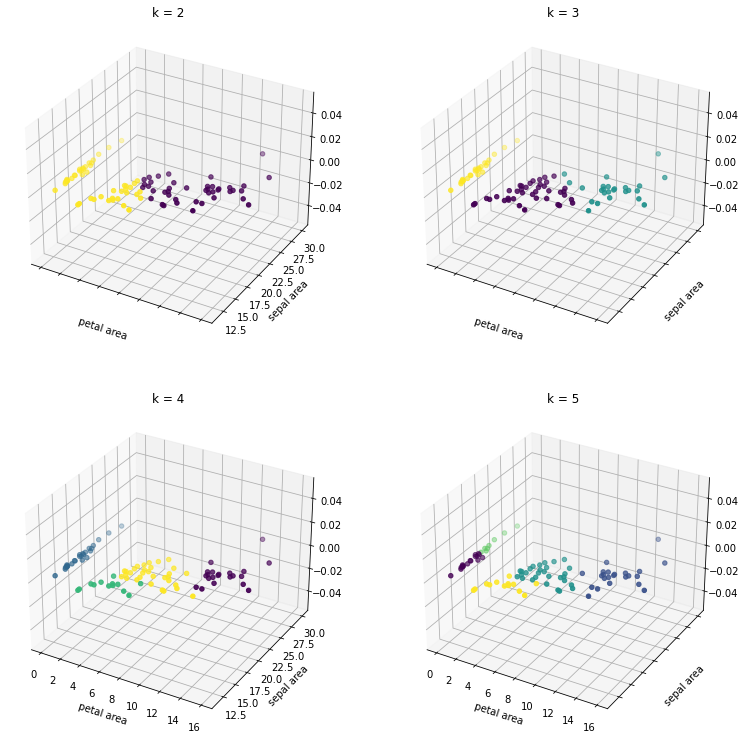

In [53]:
fig, axs = plt.subplots(
    
    2, 2,
    figsize=(13, 13),
    subplot_kw=dict(projection='3d'),
    sharex=True, sharey=True
)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_train).predict(X_train)
    ax.scatter(x, y, c=clusters)
    ax.set(title='k = {}'.format(k),
           xlabel='petal area',
           ylabel='sepal area')

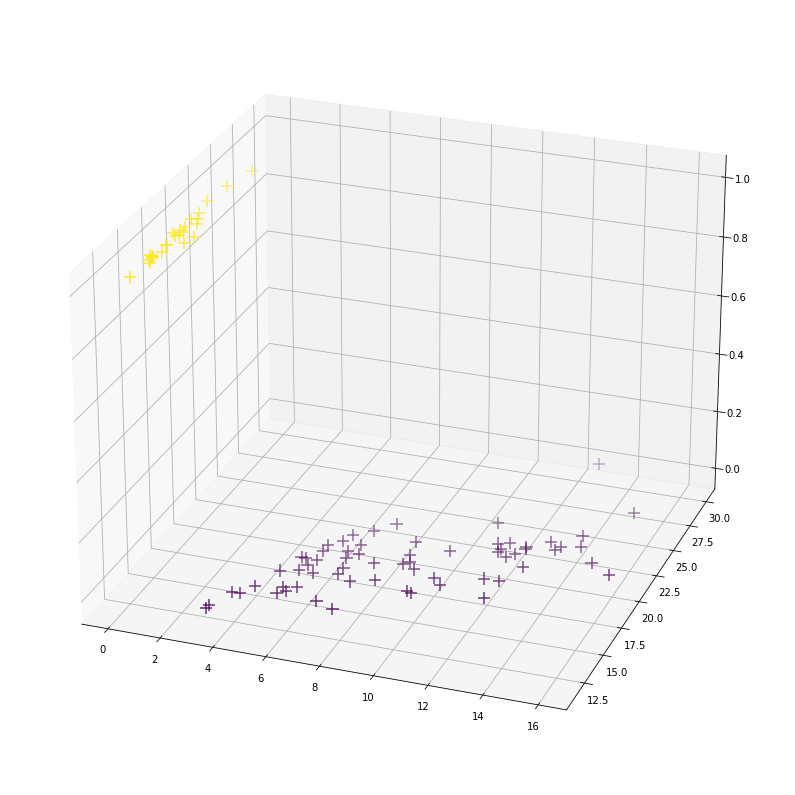

In [50]:
fig = plt.figure(figsize=(14, 20))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c=z, marker='+', s=150)
ax.view_init(25, 290)
plt.show()

## 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset.
Be sure to visualize your results!

## 3. How does scaling impact the results of clustering?

Compare k-means clustering results on scaled and unscaled data. You can show how the resulting clusters differ either with descriptive statistics or visually.